# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather" #this URL is provided as the endpoint for retrieving weather data for a specific city.

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # Converting kelvin to celcius
        city_humidity = city_weather["main"]["humidity"] # The different brackets used in the lines are due to the structure of the JSON response returned by the OpenWeatherMap API. This is how you access the wanted variables inside the JSON.
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity, # variables per city are stored as dictionary keys/values inside the city_data empty list created previously.
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | kaspiyskiy
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | westport
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | sinabang
Processing Record 14 of Set 1 | borogontsy
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | hirara
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | umm kaddadah
Processing Record 22 of Set 1 | blackmans bay
Processing R

In [5]:
city_weather # Checking the JSON response to figure out how to 'call out' the variables.

{'coord': {'lon': 109.0172, 'lat': 32.68},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 289.47,
  'feels_like': 289.64,
  'temp_min': 289.47,
  'temp_max': 289.47,
  'pressure': 1004,
  'humidity': 95,
  'sea_level': 1004,
  'grnd_level': 969},
 'visibility': 10000,
 'wind': {'speed': 0.32, 'deg': 343, 'gust': 0.33},
 'clouds': {'all': 97},
 'dt': 1711994553,
 'sys': {'country': 'CN', 'sunrise': 1712010632, 'sunset': 1712055846},
 'timezone': 28800,
 'id': 1789065,
 'name': 'Ankang',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,80,23,6.56,ZA,1711994422
1,kaspiyskiy,45.3929,47.3707,9.70,66,13,4.31,RU,1711994422
2,utrik,11.2278,169.8474,27.15,69,100,8.51,MH,1711994422
3,stanley,54.8680,-1.6985,7.06,96,75,2.57,GB,1711994380
4,bethel,41.3712,-73.4140,11.68,57,100,1.39,US,1711994423


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

# note that Date is printed in Unix timestamp, which is the number of seconds since the Unix epoch (January 1, 1970).

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,80,23,6.56,ZA,1711994422
1,kaspiyskiy,45.3929,47.3707,9.70,66,13,4.31,RU,1711994422
2,utrik,11.2278,169.8474,27.15,69,100,8.51,MH,1711994422
3,stanley,54.8680,-1.6985,7.06,96,75,2.57,GB,1711994380
4,bethel,41.3712,-73.4140,11.68,57,100,1.39,US,1711994423


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

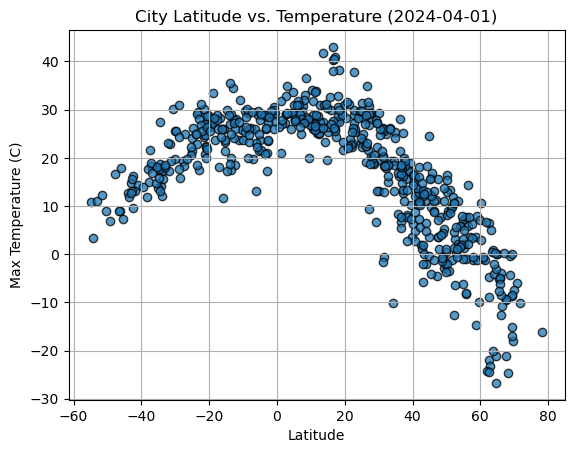

In [72]:
# Build scatter plot for latitude vs. temperature
actual_date = pd.to_datetime(city_data_df["Date"].iloc[0], unit="s").strftime("%Y-%m-%d") # Converts the Date column into a pandas series of datetime objects, then .iloc selects only the first value (we only need 1 since they're all the same day), and then we format as a string in the desired format.
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75) # Lat values as x axis, Max temp as y axis.

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

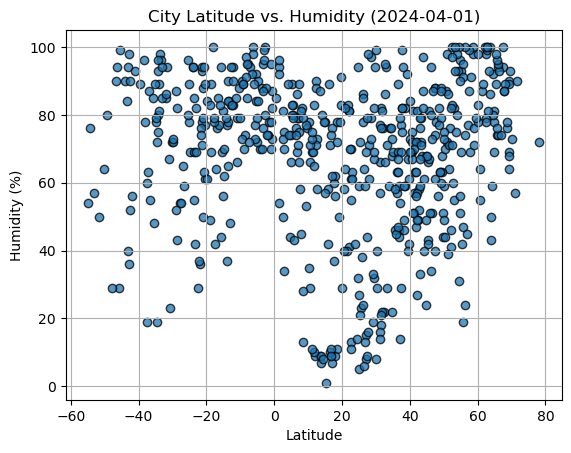

In [73]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

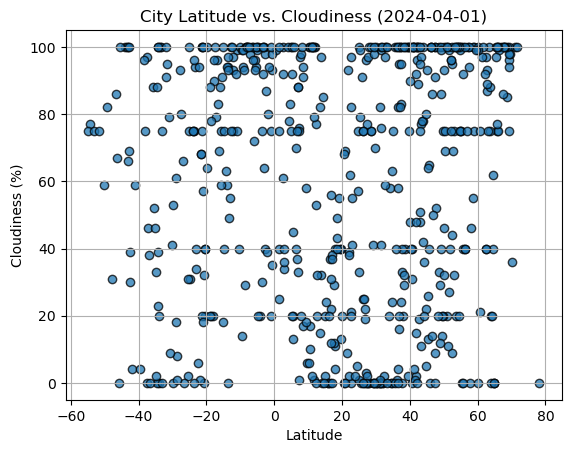

In [74]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

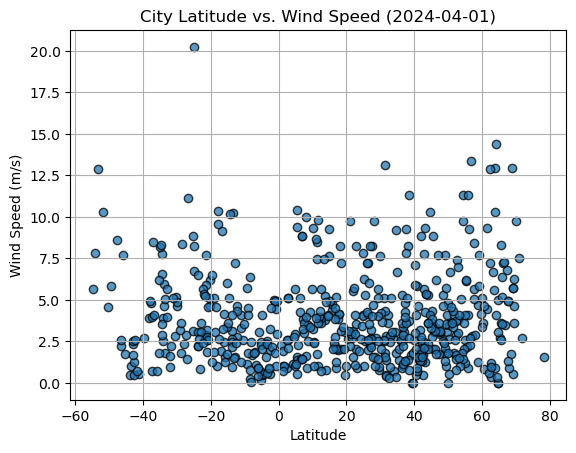

In [75]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def calculate_linear_regression(x_values, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create equation of line
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # Return regression results
    return slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq

In [77]:
# Create a DataFrame with the southern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kaspiyskiy,45.3929,47.3707,9.70,66,13,4.31,RU,1711994422
2,utrik,11.2278,169.8474,27.15,69,100,8.51,MH,1711994422
3,stanley,54.8680,-1.6985,7.06,96,75,2.57,GB,1711994380
4,bethel,41.3712,-73.4140,11.68,57,100,1.39,US,1711994423
5,westport,41.1415,-73.3579,12.77,51,100,4.63,US,1711994194


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,80,23,6.56,ZA,1711994422
7,adamstown,-25.0660,-130.1015,21.37,89,100,20.24,PN,1711994423
8,margaret river,-33.9500,115.0667,12.00,81,0,5.98,AU,1711994424
9,grytviken,-54.2811,-36.5092,3.31,76,77,7.82,GS,1711994424
11,ushuaia,-54.8000,-68.3000,10.81,54,75,5.66,AR,1711994347


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.873417212135503


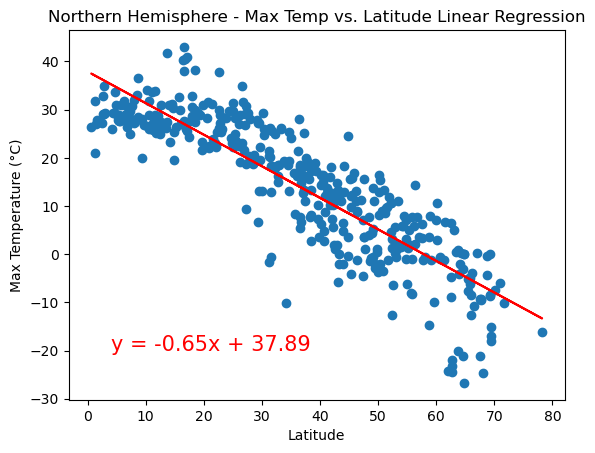

In [79]:
# Linear regression on Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (4, -20), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

The r-value is 0.7150670361632836


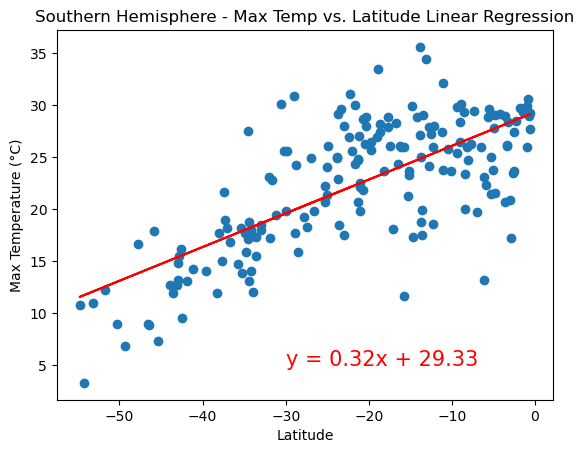

In [80]:
# Linear regression on Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Plot scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-30, 5), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere, a very strong negative correlation (r-value of .8734) between Latitude and Max temperature is observed. The more the latitude tends to north, the lower the temperatures will be. For the Southern Hemisphere, inversely, the same thing is observed. The more you drift away from the Equator (latitude 0), the colder it gets. In here, a positive correlation is observed, with a strong r-value of .7150. While it is not as strong r-value when compared to the Northern Hemisphere, it still defines a clear tendency, with slightly more variation (less adjusted line/points).

In conclusion, the Equator, Latitude 0, is generally the hottest region among the Northern and Southern Hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.28225074017400004


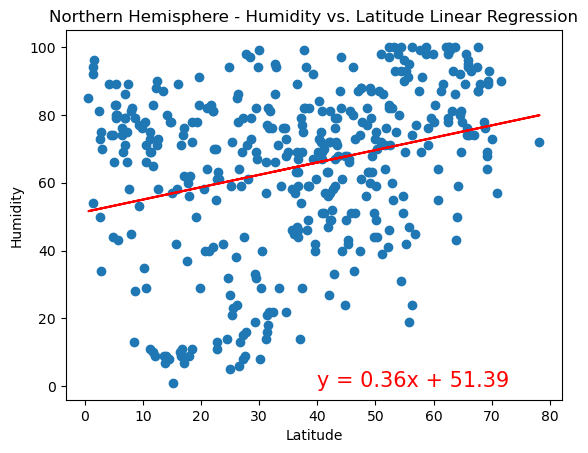

In [81]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (40, 0), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

The r-value is 0.25520526424808365


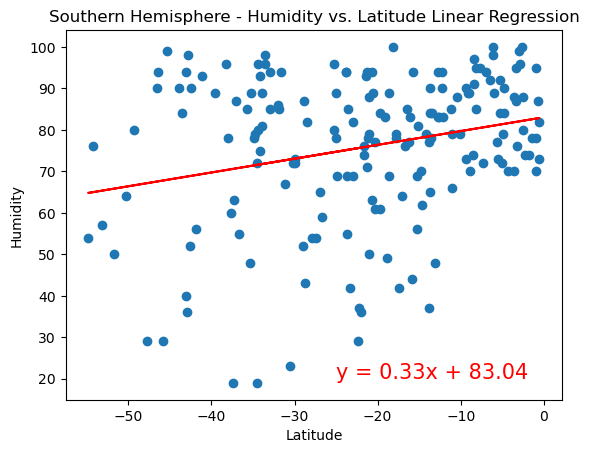

In [83]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-25, 20), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** Contrary to the Temperature graphs observed earlier, these regressions do not present a significant r-value (.25 and .28), for us to determine that there is a correlation between Latitude and Humidity.  Dispersion is very high on both ends of the analysis (northern vs southern).

Latitude alone may not be a strong predictor of Humidity.

Using these models to calculate humidity levels based on latitude changes would not be adequate.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2117051084639627


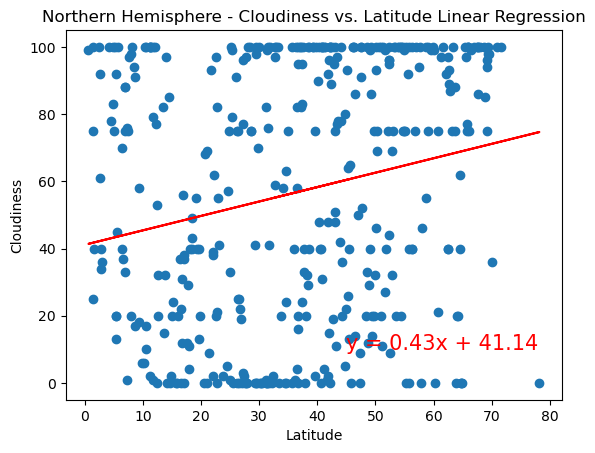

In [84]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

The r-value is 0.24141792665319275


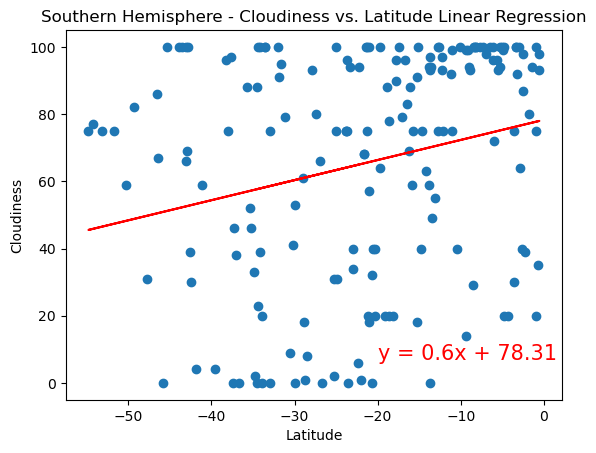

In [91]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-20, 7), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** Observing a very similar behavior to the humidity charts, these regressions do not present a significant r-value (.21 and .24), for us to determine that there is a correlation between Latitude and Cloudiness.  Dispersion is very high on both ends of the analysis (northern vs southern).

Latitude alone may not be a strong predictor of Cloudiness.

Using these models to calculate cloudiness levels based on latitude changes would not be adequate.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.09588745462009507


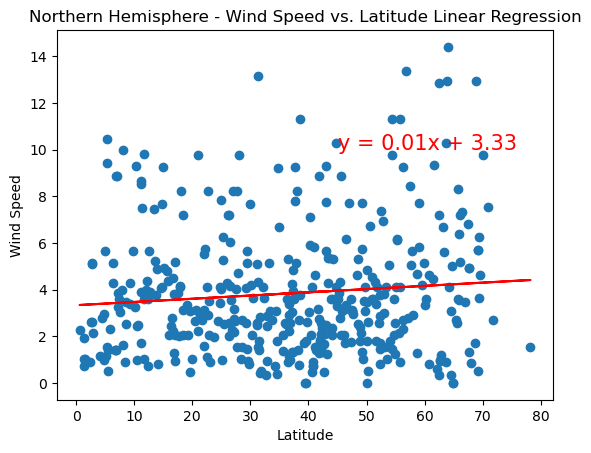

In [92]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

The r-value is -0.257975163002424


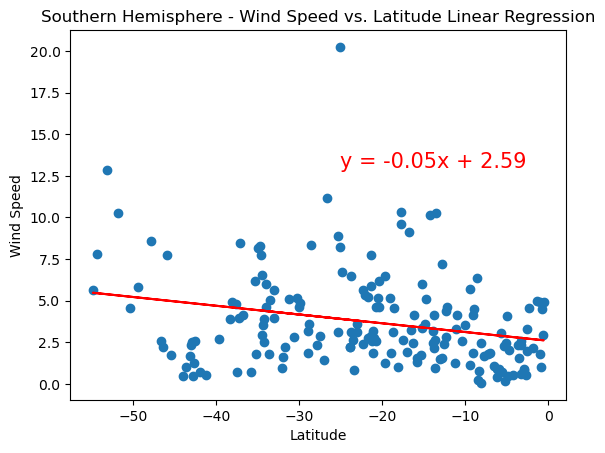

In [99]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-25, 13), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** Observing a very similar behavior to the humidity and cloudiness charts, these regressions do not present a significant r-value (.09 and .25), for us to determine that there is a correlation between Latitude and Wind Speed.  Dispersion is very high on both ends of the analysis (northern vs southern). Note: Northern correlation is by far the lowest found in this exercise.

Latitude alone may not be a strong predictor of Wind Speed.

Using these models to calculate Wind Speed levels based on latitude changes would not be adequate.

The only model which is adequate enough to estimate changes based on latitude, is Max Temp vs Latitude.